In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.incomp_utils import *


plt.style.use('seaborn-whitegrid')
# PLOT PREAMBLE: LIKE LATEX
LATEX_WIDTH = 2.8
LATEX_HEIGHT = 3.24

SCRIPT_SIZE = 7

#Direct input
plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : SCRIPT_SIZE,
          'axes.labelsize' : SCRIPT_SIZE,
          'xtick.labelsize' : SCRIPT_SIZE,
          'ytick.labelsize' : SCRIPT_SIZE,
          'legend.fontsize' : SCRIPT_SIZE,
          'figure.titlesize' : SCRIPT_SIZE,
          'font.family' : 'serif',
          'font.serif': ['Computer Modern Roman']
          }
plt.rcParams.update(params)

np.random.seed(101)

# Compatible Gaussian conditionals

In [2]:
M = np.array([[0, 4, -0.5], [4, 0, 0], [-0.5, 0, -0.5]])

sequence = PGS(x_0=0, y_0=0, update_x=lambda y: update_x_normal(y, M),
               update_y=lambda x: update_y_normal(x, M),
               N=3000)
sequence_xy, sequence_yx = split_sequence(sequence=sequence[::2], burn_in=100)

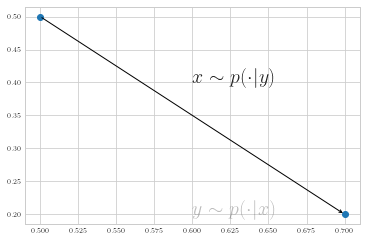

In [58]:
z_1 = np.array([.5, .5])
z_2 = np.array([.7, .2])
Z = np.vstack((z_1, z_2))

fig, ax = plt.subplots()
plt.scatter(Z[:, 0], Z[:, 1])

ax.annotate("", xy=z_2, xytext=z_1, arrowprops=dict(arrowstyle="->"))

# ax.text(0.6, 0.4, r'\textbf{Test}\\ Test', color='black',
#         bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))
ax.text(0.6, 0.4, r'$x\sim p(\cdot|y)$', fontsize=20)
ax.text(0.6, 0.2, r'$y\sim p(\cdot|x)$', fontsize=20, alpha=.3)
plt.show()

### Gif of Gibbs chain

In [40]:
from math import ceil
from matplotlib.lines import Line2D

In [4]:
# Get the long sequence with alternate coordinate updates
sequence_shifted = np.concatenate((sequence[1:, 0].reshape(-1, 1), sequence[:-1, 1].reshape(-1, 1)),
                                  axis=-1)
sequence_long = np.array(list(zip(sequence, sequence_shifted))).reshape(-1, 2)

In [27]:
for i in range(5):
    t = ceil(i / 2)
    if i % 2 == 0:
        theta = sequence[t, :]
    else:
        theta = np.array([sequence[t, 0], sequence[t-1, 1]])
    print(theta)

[0. 0.]
[0.71181092 0.        ]
[0.71181092 1.27379652]
[0.79149244 1.27379652]
[ 0.79149244 -0.26106434]


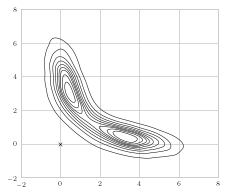

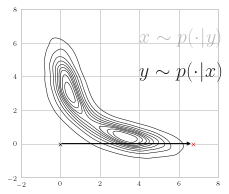

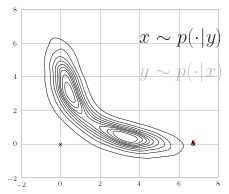

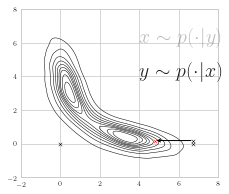

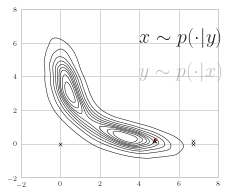

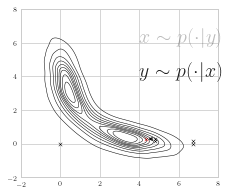

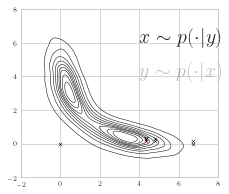

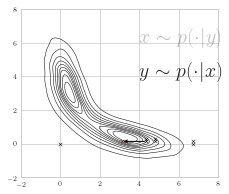

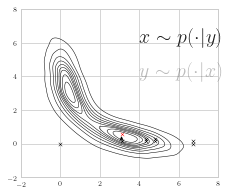

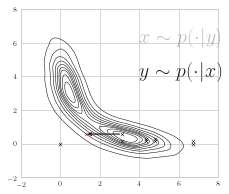

In [59]:
def plot_chain(t):
    """Plots the Gibbs chain until the t-th step."""
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(LATEX_WIDTH, .85*LATEX_WIDTH)
    plt.subplots_adjust(top = .99, bottom=.01, left=.01, right=.99, hspace=.05, wspace=.05)

    sns.kdeplot(x=sequence[:, 0], y=sequence[:, 1], color='black', linewidths=.5, ax=ax)
    if t == 0:
        ax.scatter(sequence_long[t, 0], sequence_long[t, 1],
                    s=12,
                    linewidths=.5,
                    marker='x',
                    c='black')
    else:
        ax.scatter(sequence_long[:t, 0], sequence_long[:t, 1],
                s=12,
                linewidths=.5,
                marker='x',
                c='black')

        ax.annotate("", xytext=sequence_long[t-1], xy=sequence_long[t], arrowprops=dict(arrowstyle="->"))
        ax.scatter(sequence_long[t, 0], sequence_long[t, 1],
                    s=12,
                    linewidths=.5,
                    marker='x',
                    c='red')
        # Text
        fontsize = 20
        alpha = .3
        if t % 2 == 0:
            ax.text(4, 6, r'$x\sim p(\cdot|y)$', fontsize=fontsize)
            ax.text(4, 4, r'$y\sim p(\cdot|x)$', fontsize=fontsize, alpha=alpha)
        else:
            ax.text(4, 6, r'$x\sim p(\cdot|y)$', fontsize=fontsize, alpha=alpha)
            ax.text(4, 4, r'$y\sim p(\cdot|x)$', fontsize=fontsize)

    # Axes
    ax.set_xticks(np.arange(-2, 9, 2))
    ax.set_yticks(np.arange(-2, 9, 2))
    ax.set_xlim([-2, 8])
    ax.set_ylim([-2, 8])

    # fig.legend(framealpha=1, frameon=True, markerscale=3)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image

imageio.mimsave('gibbs_chain.gif', [plot_chain(t) for t in range(10)], fps=1)

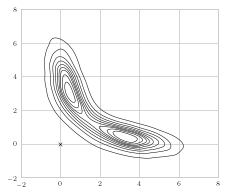

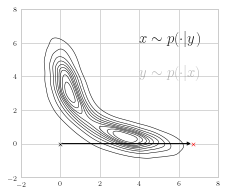

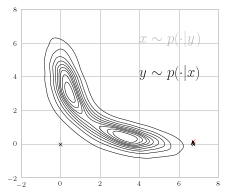

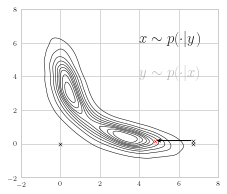

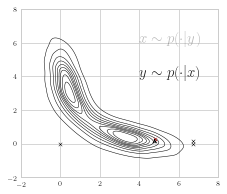

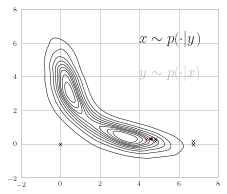

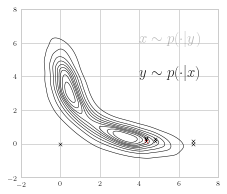

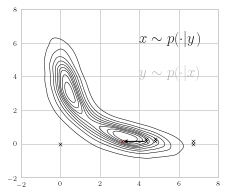

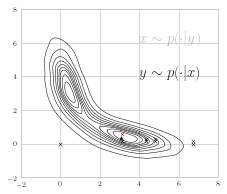

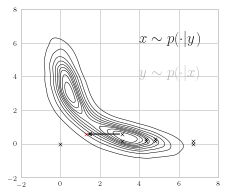

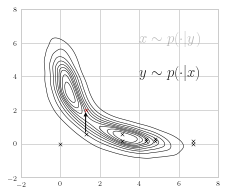

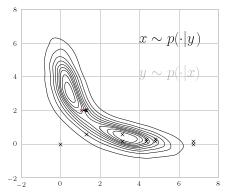

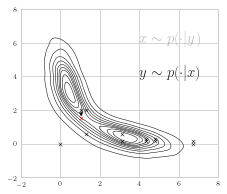

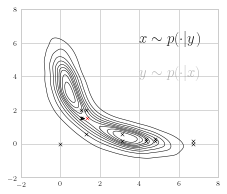

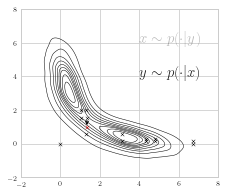

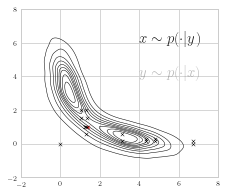

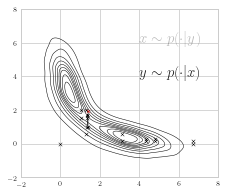

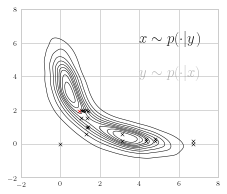

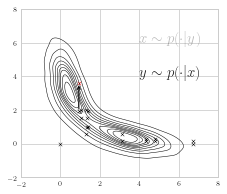

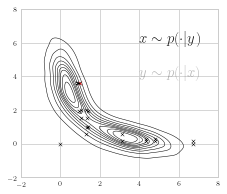

In [62]:
def plot_chain(t):
    """Plots the Gibbs chain until the t-th step."""
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(LATEX_WIDTH, .85*LATEX_WIDTH)
    plt.subplots_adjust(top = .99, bottom=.01, left=.01, right=.99, hspace=.05, wspace=.05)

    sns.kdeplot(x=sequence[:, 0], y=sequence[:, 1], color='black', linewidths=.5, ax=ax)
    if t == 0:
        ax.scatter(sequence_long[t, 0], sequence_long[t, 1],
                    s=12,
                    linewidths=.5,
                    marker='x',
                    c='black')
    else:
        ax.scatter(sequence_long[:t, 0], sequence_long[:t, 1],
                s=12,
                linewidths=.5,
                marker='x',
                c='black')

        ax.annotate("", xytext=sequence_long[t-1], xy=sequence_long[t], arrowprops=dict(arrowstyle="->"))
        ax.scatter(sequence_long[t, 0], sequence_long[t, 1],
                    s=12,
                    linewidths=.5,
                    marker='x',
                    c='red')

        # Text
        fontsize = 15
        alpha = .3
        if t % 2 == 1:
            ax.text(4, 6, r'$x\sim p(\cdot|y)$', fontsize=fontsize)
            ax.text(4, 4, r'$y\sim p(\cdot|x)$', fontsize=fontsize, alpha=alpha)
        else:
            ax.text(4, 6, r'$x\sim p(\cdot|y)$', fontsize=fontsize, alpha=alpha)
            ax.text(4, 4, r'$y\sim p(\cdot|x)$', fontsize=fontsize)

    # Axes
    ax.set_xticks(np.arange(-2, 9, 2))
    ax.set_yticks(np.arange(-2, 9, 2))
    ax.set_xlim([-2, 8])
    ax.set_ylim([-2, 8])

    plt.savefig(f'gibbs_gif_{t}.pdf')
    return

for t in range(20):
    plot_chain(t)

### Compatible (no colors)

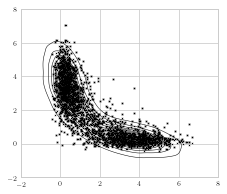

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(LATEX_WIDTH, .85*LATEX_WIDTH)
plt.subplots_adjust(top = .99, bottom=.01, left=.01, right=.99, hspace=.05, wspace=.05)

sns.kdeplot(x=sequence[:, 0], y=sequence[:, 1], color='black', linewidths=.5, ax=ax)
ax.scatter(sequence_xy[:, 0], sequence_xy[:, 1],
            s=2,
            linewidths=.5,
            marker='x',
            c='black')
ax.scatter(sequence_yx[:, 0], sequence_yx[:, 1],
            s=2.5,
            linewidths=.8,
            marker='x',
            c='black')

# Axes
ax.set_xticks(np.arange(-2, 9, 2))
ax.set_yticks(np.arange(-2, 9, 2))
ax.set_xlim([-2, 8])
ax.set_ylim([-2, 8])

# fig.legend(framealpha=1, frameon=True, markerscale=3)
plt.savefig('compatible_nocol.pdf')
plt.show()

### Compatible (colors)

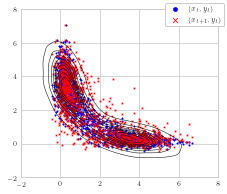

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(LATEX_WIDTH, .85*LATEX_WIDTH)
plt.subplots_adjust(top = .99, bottom=.01, left=.01, right=.99, hspace=.05, wspace=.05)

sns.kdeplot(x=sequence[:, 0], y=sequence[:, 1], color='black', linewidths=.5, ax=ax)
ax.scatter(sequence_xy[:, 0], sequence_xy[:, 1],
            s=2,
            linewidths=.5,
            marker='o',
            c='blue',
            label=r'$\left(x_{t}, y_{t}\right)$')
ax.scatter(sequence_yx[:, 0], sequence_yx[:, 1],
            s=2.5,
            linewidths=.8,
            marker='x',
            c='red',
            label=r'$\left(x_{t+1}, y_{t}\right)$')

# Axes
ax.set_xticks(np.arange(-2, 9, 2))
ax.set_yticks(np.arange(-2, 9, 2))
ax.set_xlim([-2, 8])
ax.set_ylim([-2, 8])

fig.legend(framealpha=1, frameon=True, markerscale=3)
plt.savefig('compatible_col.pdf')
plt.show()

# Inompatible Gaussian conditionals

In [10]:
def update_incomp(y):
    """Draw x given y.

    Args:
        y: value to condition on.

    Returns:
        x: one draw from the specified conditional.
    """
    mu_y = y/2
    sigma_y = np.sqrt(1) / (1+y**2)
    x = np.random.normal(mu_y, sigma_y)
    return x

In [11]:
# NOTE THAT THE SAME CONDITIONAL update_incomp IS USED FOR BOTH x AND Y
# This means that the conditionals are both normal again
sequence = PGS(x_0=0, y_0=0, update_x=update_incomp,
               update_y=update_incomp,
               N=5000)
sequence_xy, sequence_yx = split_sequence(sequence=sequence, burn_in=100)

### Inompatible (no colors)

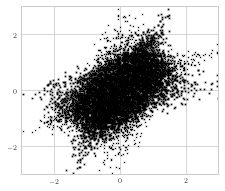

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(LATEX_WIDTH, .85*LATEX_WIDTH)
plt.subplots_adjust(top = .99, bottom=.01, left=.01, right=.99, hspace=.05, wspace=.05)

ax.scatter(sequence_xy[:, 0], sequence_xy[:, 1],
            s=2,
            linewidths=.5,
            marker='x',
            c='black')
ax.scatter(sequence_yx[:, 0], sequence_yx[:, 1],
            s=2.5,
            linewidths=.8,
            marker='x',
            c='black')

# Axes
ax.set_xticks(np.arange(-2, 3, 2))
ax.set_yticks(np.arange(-2, 3, 2))
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# fig.legend(framealpha=1, frameon=True, markerscale=3)
plt.savefig('incompatible_nocol.pdf')
plt.show()

### Inompatible (colors)

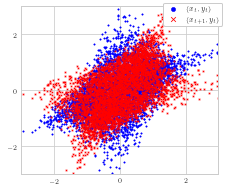

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(LATEX_WIDTH, .85*LATEX_WIDTH)
plt.subplots_adjust(top = .99, bottom=.01, left=.01, right=.99, hspace=.05, wspace=.05)

ax.scatter(sequence_xy[:, 0], sequence_xy[:, 1],
            s=2,
            linewidths=.5,
            marker='o',
            c='blue',
            label=r'$\left(x_{t}, y_{t}\right)$')
ax.scatter(sequence_yx[:, 0], sequence_yx[:, 1],
            s=2.5,
            linewidths=.8,
            marker='x',
            c='red',
            label=r'$\left(x_{t+1}, y_{t}\right)$')

# Axes
ax.set_xticks(np.arange(-2, 3, 2))
ax.set_yticks(np.arange(-2, 3, 2))
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

fig.legend(framealpha=1, frameon=True, markerscale=3)
plt.savefig('incompatible_col.pdf')
plt.show()